In [1]:
%%html
<marquee style='width: 90%; color: blue;'><b>INSTITUTO INFNET | ESCOLA SUPERIOR DA
TECNOLOGIA DA INFORMAÇÃO</b></marquee>

![logo_infnet.png](https://www.infnet.edu.br/infnet/wp-content/uploads/sites/6/2021/10/infnet_mod.svg)

<h2>Pós-graduação MIT em Inteligência Artificial, Machine Learning & Deep Learning</h2>

<h3>Projeto da disciplina de Deep Learning com TensorFlow.</h3>

Bloco: Redes neurais com TensorFlow

Docente: Diego da Silva Rodrigues

Aluno: Winicius Botelho Faquieri 

Título: Um modelo de Deep Neural Networks para classificação de estabelecimentos nos segmentos Autosserviço, Mercado Quente e Mercado Frio com diferentes funções de ativação

---

### Um modelo de Deep Neural Networks para classificação de estabelecimentos nos segmentos Autosserviço, Mercado Quente e Mercado Frio com diferentes funções de ativação

separando o conjunto de dados nos segmentos 1, 2 e 3, respectivamente: Autosserviço, Mercado Quente e Mercado Frio.


In [84]:
# Libs:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import inflection
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from sklearn import model_selection as ms
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestRegressor
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

## TABLE OF CONTENTS
* [1. Entendendo o Problema de Negócio](#label1)

* [2. A descrição dos dados](##label2)

    * [1.1 Data dimensions](#datadim)
    
    * [1.2 Data types](#datatyp)
    
    * [1.3 Check NA](#checkna)
    
    * [Fillout NA](#filloutna)
    
    * [Change data types](#changetypes)
    
    * [Descriptive statistics](#descrstats)
    
    * [Numerical atributes](#numstats)
    
    * [Categorical atributes](#categ_atrib)     
    
* [3. Feature Engineering](#label3)

* [4. Análise Exploratória dos Dados](#label4)

* [5. Preparação dos Dados](#label5)

* [6. Feature Selection](#label6)

* [7. Modelo de Machine Learning](#)

* [8. Hyperparameter Fine Tuning](#)

* [9. Interpretação e Tradução do Erro](#)

* [10. Deploy do Modelo em Produção](#)

* [References](#)


## 0. Business understanding<a class="anchor" id="dataset_info"></a>

Desafio: classificar empresas em 03 segmentos, a saber:

* Segmento I - Supermercados com 5 ou mais checkouts

* Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

* Segmento III - Bares, restaurantes, padarias

Utilizaremos os 06 recursos destacados para classificar nossos dados em canais de distribuição ou segmentos I, II ou III:

- Segmento I - Supermercados com 5 ou mais checkouts

- Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

- Segmento III - Bares, restaurantes, padarias, etc.

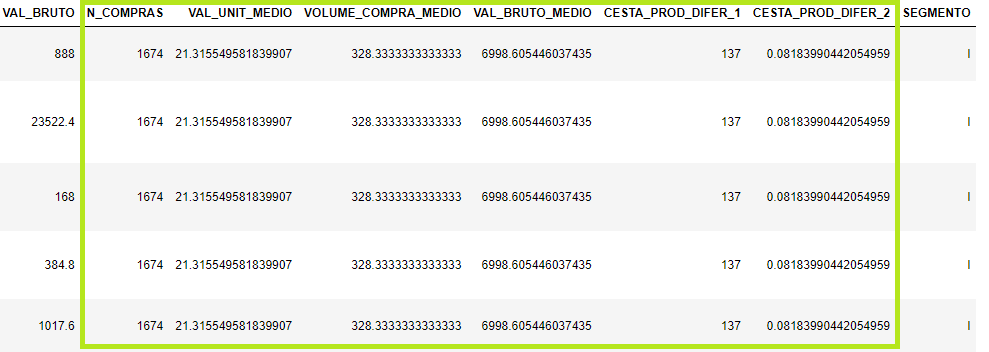

### RESUMO

Primeiramente, realizamos uma análise exploratória de dados onde observamos a distribuição de cada variável, bem como a relação entre cada variável e a variável de interesse (target). Em seguida, realizamos o pré-processamento de dados para remover dados ausentes e também padronizamos nossos dados utilizando uma abordagem robusta devido a presença de valores atípicos. Por fim, dividimos nossos dados originais aleatoriamente em um conjunto de treinamento, um conjunto de validação e um conjunto de teste.

Em seguida, analisamos a arquitetura do MLP que usamos, que consiste em 2 camadas ocultas, com xx nós na primeira camada oculta e xx nós na segunda camada oculta. Em seguida, implementamos esse MLP no Keras usando o modelo sequencial, que nos permite empilhar camadas umas sobre as outras. Então, treinamos nosso MLP usando o conjunto de treinamento, onde Keras usou o algoritmo otimizador Adam para modificar os pesos e vieses na rede neural em mais de 200 iterações, melhorando gradualmente a precisão do modelo.

Por fim, avaliamos nosso modelo usando métricas como acurácia, matriz de confusão e curva ROC. 

### CRISP-DM

- Método cíclico de desenvolvimento do projeto de DS.

- 1º ciclo CRISP completo.
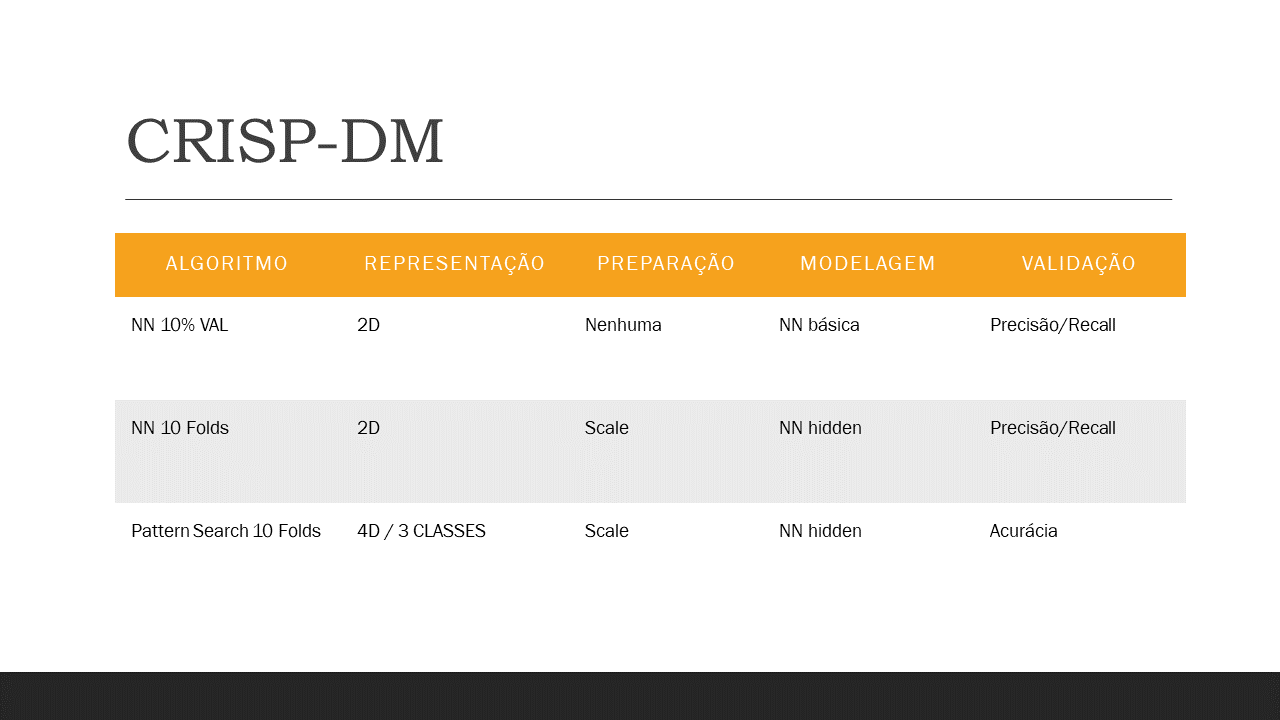



## 1. A Descrição dos Dados <a class="anchor" id="dataset_info"></a>

In [50]:
df = pd.read_csv('../data/dataset.csv', dtype=str)

In [51]:
df.head()

,NUM_DOC_DEST,N_TRANS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,CESTA_PROD_DIFER,seg
0,93209765032582,3847,21.188510626992255,3171.2399272160123,266,I
1,13004510017235,8293,20.919979153356135,295.0801881104546,244,I
2,06966628000122,1115,19.182569216795695,264.914798206278,103,I
3,30029774000106,232,14.686313469827589,62.5,56,I
4,32860231000676,2149,3.087029304447976,836.3192182410423,157,I


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NUM_DOC_DEST         3699 non-null   object
 1   N_TRANS              3699 non-null   object
 2   VAL_UNIT_MEDIO       3699 non-null   object
 3   VOLUME_COMPRA_MEDIO  3699 non-null   object
 4   CESTA_PROD_DIFER     3699 non-null   object
 5   GRUPO_PROD_DIFER     3699 non-null   object
 6   seg                  3699 non-null   object
dtypes: object(7)
memory usage: 202.4+ KB


### 1.1 Data Dimensions <a class="anchor" id="datadim"></a>

In [7]:
print( 'Number of Rows: {}'.format( df.shape[0] ) )
print( 'Number of Cols: {}'.format( df.shape[1] ) )

Number of Rows: 3699
Number of Cols: 7


### 1.2 Data Types <a class="anchor" id="datatyp"></a>

In [9]:
df.dtypes

NUM_DOC_DEST           object
N_TRANS                object
VAL_UNIT_MEDIO         object
VOLUME_COMPRA_MEDIO    object
CESTA_PROD_DIFER       object
GRUPO_PROD_DIFER       object
seg                    object
dtype: object

### 1.3 Check NA<a class="anchor" id="checkna"></a>

In [10]:
df.isna().sum()

NUM_DOC_DEST           0
N_TRANS                0
VAL_UNIT_MEDIO         0
VOLUME_COMPRA_MEDIO    0
CESTA_PROD_DIFER       0
GRUPO_PROD_DIFER       0
seg                    0
dtype: int64

### 1.4 Change data types <a class="anchor" id="changetypes"></a>

In [60]:
df['N_TRANS'] = df['N_TRANS'].astype( int )

# VAL_UN_COMPRA: VALOR UNITÁRIO PAGO PELA COMPRA
df['VAL_UNIT_MEDIO'] = df['VAL_UNIT_MEDIO'].astype( float )
df['VAL_UNIT_MEDIO'] = df['VAL_UNIT_MEDIO'].round(decimals = 2)

# VAL_BRUTO: VAL_UN_COMPRA X NUM_QTD_COMPRA
df['VOLUME_COMPRA_MEDIO'] = df['VOLUME_COMPRA_MEDIO'].astype( float )
df['VOLUME_COMPRA_MEDIO'] = df['VOLUME_COMPRA_MEDIO'].round(decimals = 2)

df['CESTA_PROD_DIFER'] = df['CESTA_PROD_DIFER'].astype( int )

df.dtypes

NUM_DOC_DEST            object
N_TRANS                  int32
VAL_UNIT_MEDIO         float64
VOLUME_COMPRA_MEDIO    float64
CESTA_PROD_DIFER         int32
seg                     object
dtype: object

### 1.5 Descriptive statistics <a class="anchor" id="descrstats"></a>

In [61]:
num_attributes = df.select_dtypes( include=['int32', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int32', 'float64','datetime64[ns]'] )

### 1.6 Numerical atributes <a class="anchor" id="numstats"></a>

In [62]:
# Central Tendency - mean, meadina
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std','skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,N_TRANS,1.00,8752.00,8751.00,390.512301,151.00,717.239176,4.746505,32.516963
1,VAL_UNIT_MEDIO,0.57,104.89,104.32,17.032476,12.81,15.389505,1.648951,3.817230
2,VOLUME_COMPRA_MEDIO,10.00,9604.96,9594.96,224.864388,112.33,496.712648,7.970708,90.182047
3,CESTA_PROD_DIFER,1.00,332.00,331.00,40.104893,24.00,46.810880,2.326335,6.224756


<AxesSubplot:xlabel='N_TRANS', ylabel='Count'>

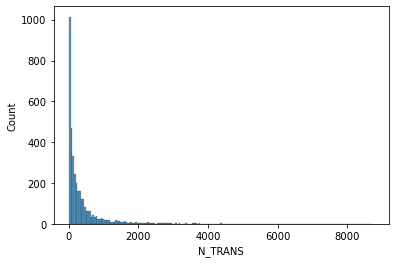

In [16]:
sns.histplot( df['N_TRANS'], kde=False )

### FEATURE ENGINEERING <a class="anchor" id="hipotes"></a>

- Canais de distribuição:

Segmento I - Supermercados com 5 ou mais checkouts

Segmento II - Supermercados com 4 ou menos checkouts (mercadinhos, mercearias, etc)

Segmento III - Bares, restaurantes, padarias, etc.

**Hipóteses**:

- H1: VALOR UNITÁRIO MÉDIO DE COMPRA: É esperado um valor unitário da compra maior de empresas no segmento 3 do que nos segmentos 1 e 2? 



- H2. QUANTIDADE COMPRADA: É esperado um volume médio de compras maior por empresas do segmento 1 do que de outros segmentos?



- H3. CESTA DE PRODUTOS DIFERENTES: é esperado um mix de produtos maior no segmento 1 do que nos segmentos 2 e 3? 



- H4. TRANSAÇÕES EFETUADAS: É esperado um número de compras realizadas maior no segmento 1 do que em outros segmentos?

...


### ANÁLISE EXPLORATÓRIA DE DADOS <a class="anchor" id="prep"></a>

Objetivos:

- Validar hipóteses (insights)

- Perceber variáveis que são importantes para o modelo

### Distribuição da variável target

> Cerca de 2% da coluna SEGMENTO não estão classificados em I, II ou III. Nosso problema consiste em classificar esses dados.

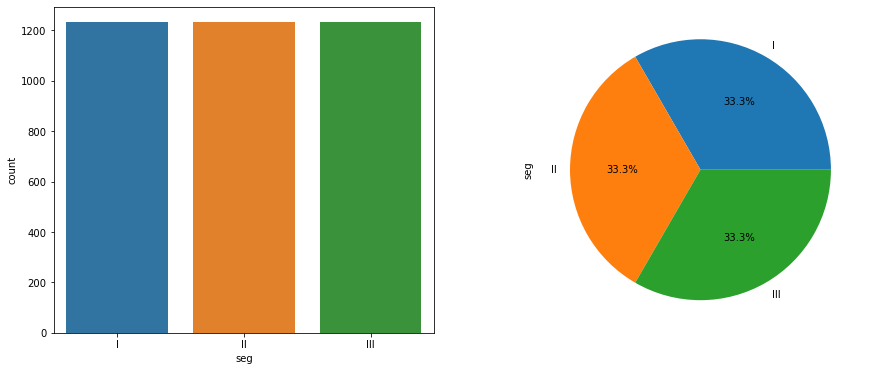

In [64]:
features = df.copy()
fig, ax=plt.subplots(1,2,figsize=(15,6))
_ = sns.countplot(x='seg', data=features, ax=ax[0])
_ = features['seg'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

In [65]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NUM_DOC_DEST         3699 non-null   object 
 1   N_TRANS              3699 non-null   int32  
 2   VAL_UNIT_MEDIO       3699 non-null   float64
 3   VOLUME_COMPRA_MEDIO  3699 non-null   float64
 4   CESTA_PROD_DIFER     3699 non-null   int32  
 5   seg                  3699 non-null   object 
dtypes: float64(2), int32(2), object(2)
memory usage: 144.6+ KB


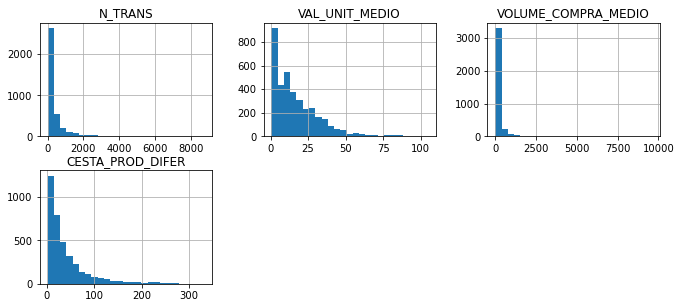

In [66]:
plt.rcParams["figure.figsize"] = (800/72., 4.8)
num_attributes.hist( bins=25, layout=(2,3) );

 - Análise bivariada:
 
 H1: É esperado um valor unitário da compra maior de empresas no segmento 3 do que nos segmentos 1 e 2? Por outras palavras, empresas nesse canal de distribuição (bares e restaurantes) pagam um preço unitário médio maior do que nos outros segmentos?
 
 

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

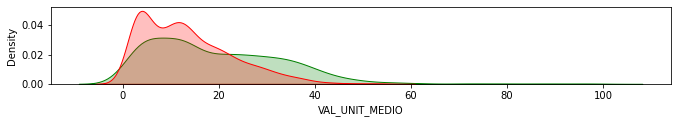

In [68]:
plt.rcParams["figure.figsize"] = (800/72., 4.8)
plt.subplot( 3, 1, 1 )
sns.kdeplot( features[features['seg'] == 'I']['VAL_UNIT_MEDIO'], label='SEGMENTO I', shade=True, color = 'green')
sns.kdeplot( features[features['seg'] == 'II']['VAL_UNIT_MEDIO'], label='SEGMENTO II', shade=True, color = 'red' )

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

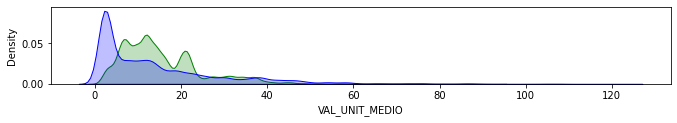

In [76]:
plt.subplot( 3, 1, 1 )
sns.kdeplot( features1[features1['SEGMENTO'] == 'I']['VAL_UNIT_MEDIO'], label='SEGMENTO I', shade=True, color = 'green' )
sns.kdeplot( features1[features1['SEGMENTO'] == 'III']['VAL_UNIT_MEDIO'], label='SEGMENTO III', shade=True , color = 'blue')

<AxesSubplot:xlabel='VAL_UNIT_MEDIO', ylabel='Density'>

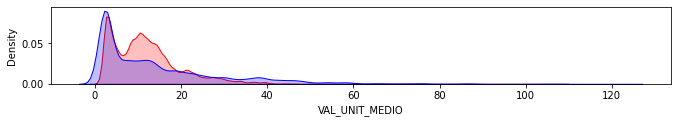

In [84]:
plt.subplot( 3, 1, 1 )
sns.kdeplot( VAL_UNIT_MEDIO[features1['SEGMENTO'] == 'II']['VAL_UNIT_MEDIO'], label='SEGMENTO II', shade=True, color = 'red' )
sns.kdeplot( features1[features1['SEGMENTO'] == 'III']['VAL_UNIT_MEDIO'], label='SEGMENTO III', shade=True, color = 'blue' )

### DATA PREPARATION <a class="anchor" id="prep"></a>

> O aprendizado da maioria dos algoritmos de ML é facilitado por dados numéricos, na mesma escala.

- Normalização: reescala o centro para zero com desvio-padrao igual a 1.


- Rescaling: reescala para o intervalo 0 e 1 (distribuições não Gaussianas):


    - Min-Max Scaler: utiliza o range
    - Robust Scaler: utiliza o IQR


- Transformação: conversão da feature categórica para numérica - encoding - e de natureza.

In [69]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
N_TRANS,3699.0,390.512301,717.336147,1.00,42.000,151.00,412.000,8752.00
VAL_UNIT_MEDIO,3699.0,17.032476,15.391585,0.57,4.885,12.81,24.955,104.89
VOLUME_COMPRA_MEDIO,3699.0,224.864388,496.779803,10.00,40.000,112.33,210.635,9604.96
CESTA_PROD_DIFER,3699.0,40.104893,46.817209,1.00,11.000,24.00,51.000,332.00


<AxesSubplot:xlabel='seg', ylabel='N_TRANS'>

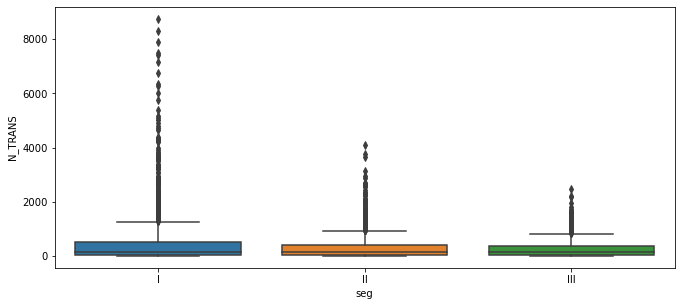

In [70]:
sns.boxplot( x='seg', y='N_TRANS', data=features )

<AxesSubplot:xlabel='seg', ylabel='VAL_UNIT_MEDIO'>

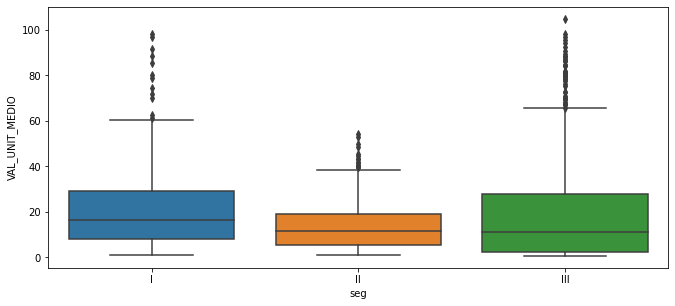

In [28]:
sns.boxplot( x='seg', y='VAL_UNIT_MEDIO', data=features )

<AxesSubplot:xlabel='seg', ylabel='VOLUME_COMPRA_MEDIO'>

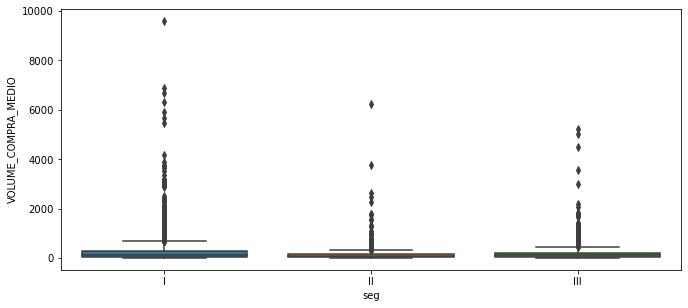

In [29]:
sns.boxplot( x='seg', y='VOLUME_COMPRA_MEDIO', data=features )

<AxesSubplot:xlabel='seg', ylabel='CESTA_PROD_DIFER'>

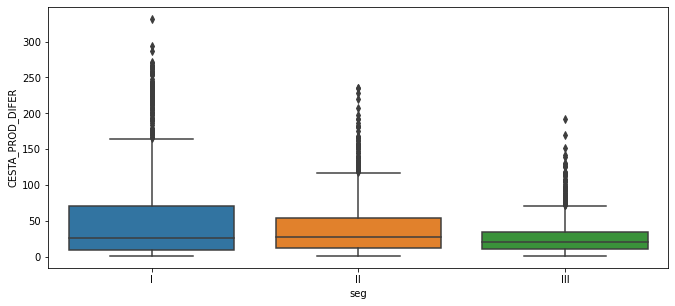

In [32]:
sns.boxplot( x='seg', y='CESTA_PROD_DIFER', data=features )

<AxesSubplot:xlabel='seg', ylabel='GRUPO_PROD_DIFER'>

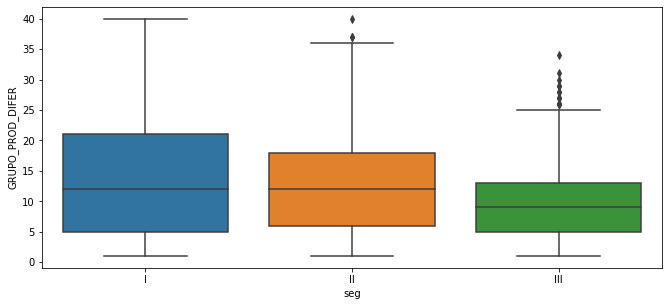

In [35]:
sns.boxplot( x='seg', y='GRUPO_PROD_DIFER', data=features )

### Rescaling: Robust Scaler (RS)

Vamos utilizar o método RS devido a presença de valores atípicos. 

In [72]:
features2 = features.copy()
rs = RobustScaler()

features2['N_TRANS'] = rs.fit_transform( features2[['N_TRANS']].values )
features2['VAL_UNIT_MEDIO'] = rs.fit_transform( features2[['VAL_UNIT_MEDIO']].values )
features2['VOLUME_COMPRA_MEDIO'] = rs.fit_transform( features2[['VOLUME_COMPRA_MEDIO']].values )
features2['CESTA_PROD_DIFER'] = rs.fit_transform( features2[['CESTA_PROD_DIFER']].values )

In [73]:
features2.describe().T

,count,mean,std,min,25%,50%,75%,max
N_TRANS,3699.0,0.647331,1.938746,-0.405405,-0.294595,0.0,0.705405,23.245946
VAL_UNIT_MEDIO,3699.0,0.210387,0.766895,-0.609865,-0.394868,0.0,0.605132,4.587942
VOLUME_COMPRA_MEDIO,3699.0,0.659504,2.911359,-0.599701,-0.423887,0.0,0.576113,55.631201
CESTA_PROD_DIFER,3699.0,0.402622,1.170430,-0.575000,-0.325000,0.0,0.675000,7.700000


In [37]:
# after rescaling
features2.head()

,NUM_DOC_DEST,N_TRANS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,CESTA_PROD_DIFER,GRUPO_PROD_DIFER,seg
0,93209765032582,9.989189,0.417539,17.926627,6.050,2.166667,I
1,13004510017235,22.005405,0.404086,1.071000,5.500,2.250000,I
2,06966628000122,2.605405,0.317389,0.894189,1.975,1.333333,I
3,30029774000106,0.218919,0.093672,-0.292027,0.800,1.000000,I
4,32860231000676,5.400000,-0.484305,4.242916,3.325,1.750000,I


In [61]:
# before
features.head()

,NUM_DOC_DEST,N_COMPRAS,VAL_UNIT_MEDIO,VOLUME_COMPRA_MEDIO,CESTA_PROD_DIFER_1,CESTA_PROD_DIFER_2,GRUPO_PROD_DIFER_1,seg
0,12058181000196,668.0,5.460947,146.931138,62.0,0.092814,17.0,II
1,93209765032582,3847.0,21.188511,3171.239927,266.0,0.069145,36.0,I
2,13004510017235,8293.0,20.919979,295.080188,244.0,0.029422,37.0,I
3,01031452000101,170.0,27.170852,167.411765,28.0,0.164706,12.0,III
4,13964957000108,128.0,20.630894,66.484375,36.0,0.281250,18.0,III


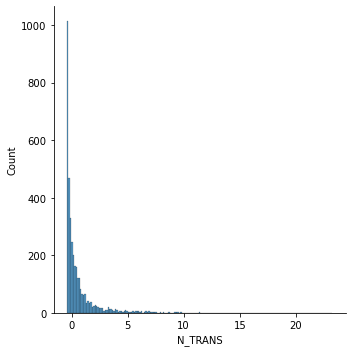

In [43]:
sns.displot( features2['N_TRANS'] );

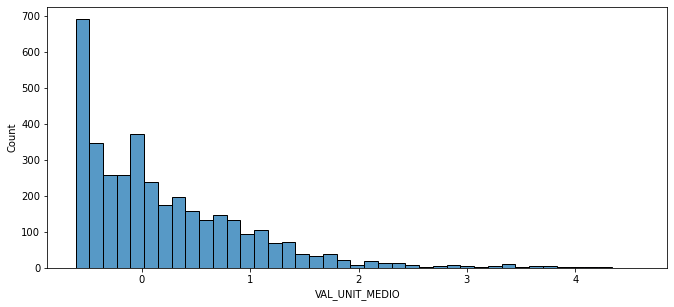

In [42]:
sns.histplot( features2['VAL_UNIT_MEDIO'] );

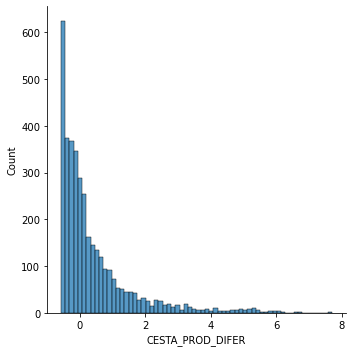

In [44]:
sns.displot( features2['CESTA_PROD_DIFER'] );

### Encoding da variável categórica

In [74]:
features3 = features2.copy()

# Segmento - Ordinal Encoding
segmento_dict = {'I': 1, 'II': 2, 'III': 3}
features3['seg'] = features3['seg'].map( segmento_dict );

In [75]:
features3 = features3.drop( 'NUM_DOC_DEST', axis=1 )

### FEATURE SELECTION

> The process of reducing the number of input variables when developing a predictive model. 
It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, 
in some cases, to improve the performance of the model.

FILTER (before training) X WRAPPER (ocorre após o treinamento e utiliza as estatísticas geradas pelo próprio modelo)

- Análise estatítica
- Filter: Correlação, ANOVA.
- Wrapper: Árvores de decisão (entropia/**gini**), redes neurais (dropout/**relevância**)
- Correlação x Relevância
- Multicolinearidade -> Análise Discriminante Linear (LDA) ?


### Dividindo os dados em conjuntos de treinamento, teste e validação

#### Setup:
    - Full data 100% 
    - test      20%  -> Generalization!
    - training  80%, sendo 80% train + 20% validation -> Aprendizado!

In [76]:
features4 = features3.copy()

class_col = 'seg'
my_vars = list(features4.columns[features4.columns != class_col])
X = features4[my_vars]
X = np.asarray(X).astype('float32')

y = features4[[class_col]].values.ravel()

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [77]:
# # # split training into train and test datset
X_train, X_test, y_train, y_test = ms.train_test_split(X, dummy_y, test_size=0.2, random_state=42)

# make the second split to create the final training set and the validation set:
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2)

print( X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(2367, 4) (2367, 3) (740, 4) (740, 3) (592, 4) (592, 3)


# DNN Training

In [ ]:
# ==================== 1ª Epoca =======================
# foward: dados * pesos -> função de ativação -> predito
# real - predito = erro
# backpropagation: erro -> derivadas parciais -> update pesos

# ==================== 2ª Epoca =======================
# foward: dados * pesos -> função de ativação -> predito
# real - predito = erro
# backpropagation: erro -> derivadas parciais -> update pesos

# Até os pesos convergirem...

- Definindo o número de neurônios na hidden layer

> 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'. -Jeff Heaton

Utilizamos para este fim duas abordagens:

1. Grid search (tentativa e erro). Testamos, nesse sentido, várias combinações para chegarmos no melhor resultado; e
2. Resultado de pesquisas anteriores em problemas similares serviu para nortear o trabalho. Mais especificamente, o trabalho de [ELDEM et. al (2018)](https://ieeexplore.ieee.org/document/8620866).

In [78]:
# define baseline model:
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_dim=4))

# Add the second hidden layer
model.add(Dense(20, activation='relu'))

# Add the output layer 
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=300)

Epoch 1/300
74/74 [==============================] - 2s 4ms/step - loss: 1.0530 - accuracy: 0.4094
Epoch 2/300
74/74 [==============================] - 0s 4ms/step - loss: 1.0053 - accuracy: 0.5053
Epoch 3/300
74/74 [==============================] - 0s 4ms/step - loss: 0.9730 - accuracy: 0.5239
Epoch 4/300
74/74 [==============================] - 0s 4ms/step - loss: 0.9562 - accuracy: 0.5311
Epoch 5/300
74/74 [==============================] - 0s 5ms/step - loss: 0.9452 - accuracy: 0.5374
Epoch 6/300
74/74 [==============================] - 0s 4ms/step - loss: 0.9361 - accuracy: 0.5534
Epoch 7/300
74/74 [==============================] - 0s 4ms/step - loss: 0.9276 - accuracy: 0.5610
Epoch 8/300
74/74 [==============================] - 0s 4ms/step - loss: 0.9270 - accuracy: 0.5670
Epoch 9/300
74/74 [==============================] - 0s 4ms/step - loss: 0.9197 - accuracy: 0.5644
Epoch 10/300
74/74 [==============================] - 0s 4ms/step - loss: 0.9152 - accuracy: 0.5678
Epoch 11/

74/74 [==============================] - 0s 4ms/step - loss: 0.8420 - accuracy: 0.6130
Epoch 84/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8425 - accuracy: 0.6227
Epoch 85/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8400 - accuracy: 0.6215
Epoch 86/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8400 - accuracy: 0.6244
Epoch 87/300
74/74 [==============================] - 0s 5ms/step - loss: 0.8398 - accuracy: 0.6198
Epoch 88/300
74/74 [==============================] - 0s 5ms/step - loss: 0.8389 - accuracy: 0.6206
Epoch 89/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8383 - accuracy: 0.6172
Epoch 90/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8383 - accuracy: 0.6198
Epoch 91/300
74/74 [==============================] - 0s 5ms/step - loss: 0.8364 - accuracy: 0.6202
Epoch 92/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8421 - accuracy: 0.6147
Epoch 93/300


74/74 [==============================] - 0s 5ms/step - loss: 0.8086 - accuracy: 0.6320
Epoch 165/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8073 - accuracy: 0.6384
Epoch 166/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8099 - accuracy: 0.6316
Epoch 167/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8098 - accuracy: 0.6316
Epoch 168/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8042 - accuracy: 0.6392
Epoch 169/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8070 - accuracy: 0.6346
Epoch 170/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8048 - accuracy: 0.6341
Epoch 171/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8075 - accuracy: 0.6384
Epoch 172/300
74/74 [==============================] - 0s 4ms/step - loss: 0.8066 - accuracy: 0.6312
Epoch 173/300
74/74 [==============================] - 0s 3ms/step - loss: 0.8047 - accuracy: 0.6379
Epoc

74/74 [==============================] - 0s 3ms/step - loss: 0.7852 - accuracy: 0.6439
Epoch 246/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7858 - accuracy: 0.6477
Epoch 247/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7866 - accuracy: 0.6401
Epoch 248/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7859 - accuracy: 0.6422
Epoch 249/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7834 - accuracy: 0.6464
Epoch 250/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7851 - accuracy: 0.6460
Epoch 251/300
74/74 [==============================] - 0s 4ms/step - loss: 0.7850 - accuracy: 0.6430
Epoch 252/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7885 - accuracy: 0.6396
Epoch 253/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7835 - accuracy: 0.6472
Epoch 254/300
74/74 [==============================] - 0s 3ms/step - loss: 0.7849 - accuracy: 0.6443
Epoc

### Results Analysis

Vamos avaliar nosso modelo com base na **acurácia**, **matriz de confusão** e **curva ROC**.

In [80]:
# Testing accuracy
scores = model.evaluate(X_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(X_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

74/74 [==============================] - 1s 3ms/step - loss: 0.7756 - accuracy: 0.6447
Training Accuracy: 64.47%

24/24 [==============================] - 0s 3ms/step - loss: 0.9641 - accuracy: 0.5514
Testing Accuracy: 55.14%



A precisão é de 86.94% e 86.85% no conjunto de treinamento e no conjunto de teste, respectivamente. O que significa que, dadas as seis features de uma nova empresa, nosso modelo é capaz de prever com precisão de ~ 87% se essa empresa pertence ao segmento Autosserviço, Mercado Quente ou Mercado Frio.

24/24 [==============================] - 0s 4ms/step


Text(79.0, 0.5, 'Actual')

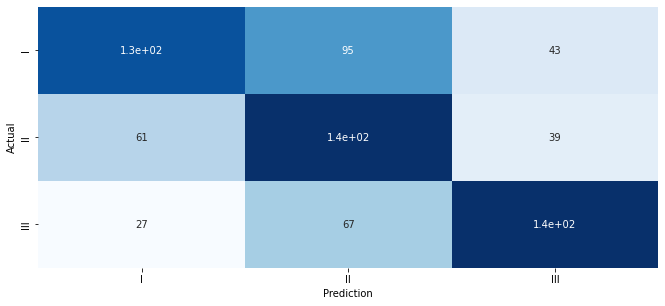

In [83]:
# MATRIZ DE CONFUSÃO

predictions = model.predict(X_test)

c_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
classification_report(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))

ax = sns.heatmap(c_matrix, annot=True, 
                 xticklabels=['I','II','III'],
                 yticklabels=['I','II','III'], 
                 cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [89]:
# CURVA ROC
y_test_pred_probs = model.predict(X_test)

FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],[0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')

24/24 [==============================] - 0s 3ms/step


ValueError: multilabel-indicator format is not supported